In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
X = np.array([[1,2], [1.5,1.8], [5,8], [8,8], [1,0.6], [9,11]])

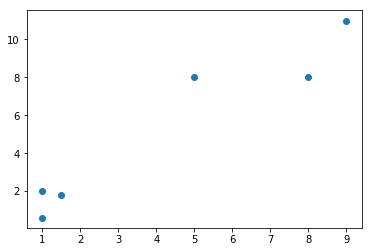

In [9]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [10]:
from sklearn.cluster import KMeans

In [11]:
k_means = KMeans(n_clusters=2)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
k_means.labels_

array([0, 0, 1, 1, 0, 1], dtype=int32)

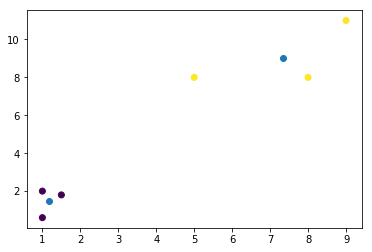

In [17]:
plt.scatter(X[:,0], X[:,1], c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1])
plt.show()

In [32]:
class K_Means:
    def __init__(self, k = 2, max_iter = 1000):
        self.k = k
        self.max_iter = max_iter
    
    def fit(self, data):
        self.means = []
        for i in range(self.k):
            self.means.append(data[i])
        self.labels = []
        for it in range(self.max_iter):
            cluster_points = []
            for i in range(self.k):
                cluster_points.append([])
            for point in data:
                distances = [((point - m)**2).sum() for m in self.means]
                min_distance = min(distances)
                classification = distances.index(min_distance)
                cluster_points[classification].append(point)
            change = False
            for i in range(self.k):
                new_mean = np.average(cluster_points[i], axis = 0)
                if not np.array_equal(self.means[i], new_mean) :
                    change = True
                self.means[i] = new_mean
            if not change:
                break
        self.labels = self.predict(data)
    
    def predict(self, test_data):
        cluster_pred = []
        for point in test_data:
            distances = [((point - m)**2).sum() for m in self.means]
            min_distance = min(distances)
            classification = distances.index(min_distance)
            cluster_pred.append(classification)
        return cluster_pred

In [33]:
c = K_Means()
c.k

2

In [34]:
c.fit(X)

In [35]:
c.labels

[0, 0, 1, 1, 0, 1]

In [36]:
c.predict(X)

[0, 0, 1, 1, 0, 1]